In [40]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving df_zipcode.csv to df_zipcode.csv


In [28]:
import io
df = pd.read_csv(io.BytesIO(uploaded['df_zipcode.csv']))

In [29]:
df.describe()

,sale_price,latitude,longitude,land_val,imp_val,year_built,sqft_lot,sqft,grade,fbsmt_grade,...,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,year,zipcode
count,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,...,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00
mean,1064284.58,47.63,-122.34,487012.55,487310.74,1942.58,6001.87,1902.27,7.32,4.09,...,0.02,0.12,0.11,0.40,0.04,0.13,0.10,0.02,2020.05,98124.55
std,660373.89,0.07,0.04,344108.94,347250.79,27.60,3656.75,852.55,1.04,3.41,...,0.24,0.56,0.53,0.95,0.32,0.57,0.51,0.20,1.36,23.92
min,65000.00,47.50,-122.42,0.00,0.00,1900.00,773.00,260.00,3.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2018.00,98015.00
25%,699000.00,47.56,-122.38,291000.00,279000.00,1922.00,4200.00,1290.00,7.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019.00,98112.00
50%,890000.00,47.64,-122.34,432000.00,427000.00,1941.00,5355.00,1780.00,7.00,6.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020.00,98117.00
75%,1250000.00,47.68,-122.30,605000.00,606000.00,1953.00,6960.00,2340.00,8.00,7.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2021.00,98126.00
max,14850000.00,47.73,-122.24,7560000.00,7946000.00,2022.00,155267.00,12280.00,13.00,13.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2022.00,98199.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24938 entries, 0 to 24937
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_date         24938 non-null  object 
 1   sale_price        24938 non-null  int64  
 2   latitude          24938 non-null  float64
 3   longitude         24938 non-null  float64
 4   city              24938 non-null  object 
 5   zoning            24938 non-null  object 
 6   land_val          24938 non-null  int64  
 7   imp_val           24938 non-null  int64  
 8   year_built        24938 non-null  int64  
 9   sqft_lot          24938 non-null  int64  
 10  sqft              24938 non-null  int64  
 11  grade             24938 non-null  int64  
 12  fbsmt_grade       24938 non-null  int64  
 13  home_condition    24938 non-null  int64  
 14  stories           24938 non-null  float64
 15  beds              24938 non-null  int64  
 16  bath_full         24938 non-null  int64 

In [30]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['sale_month'] = df['sale_date'].dt.month
df['sale_day'] = df['sale_date'].dt.day
df.rename(columns={'year': 'sale_year'}, inplace=True)
df.head()

,sale_date,sale_price,latitude,longitude,city,zoning,land_val,imp_val,year_built,sqft_lot,...,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,sale_year,zipcode,sale_month,sale_day
0,2018-01-02,665000,47.56,-122.32,SEATTLE,SF 5000,41000,122000,1920,2525,...,0,0,0,0,0,0,2018,98108,1,2
1,2018-01-09,499000,47.52,-122.32,SEATTLE,SF 5000,29000,55000,1907,6000,...,0,0,0,0,0,0,2018,98108,1,9
2,2018-02-14,675000,47.62,-122.30,SEATTLE,SF 5000,97000,132000,1908,5286,...,2,0,0,0,0,0,2018,98112,2,14
3,2018-02-13,1150000,47.72,-122.34,SEATTLE,SF 7200,440000,221000,1920,47916,...,0,0,0,0,0,4,2018,98133,2,13
4,2018-02-14,705000,47.67,-122.32,SEATTLE,SF 5000,81000,72000,1918,3825,...,0,0,0,0,0,0,2018,98105,2,14


In [31]:
# assign number values to zoning data for single family homes
df['zoning'].value_counts()
category_mapping = {
    'NR3': 1,
    'NR2': 2,
    'SF 5000': 3,
    'RSL (M)': 4,
    'SF 7200': 5,
    'NR1': 6,
    'SF 9600': 7
}

# Replace categorical values with integer values using the mapping
df['zoning'] = df['zoning'].map(category_mapping)
df['zoning'].value_counts()

1    16716
2     4014
3     2191
4     1293
5      360
6      313
7       51
Name: zoning, dtype: int64

In [32]:
# Specify the column to exclude from the subset
column_to_exclude = 'sale_day'

# Create a subset of columns by excluding the specified column
subset_columns = [col for col in df.columns if col != column_to_exclude]

# Create a new DataFrame with the subset of columns
df_subset = df[subset_columns]

# Remove duplicate rows based on the subset of columns
df_no_duplicates = df_subset.drop_duplicates()
df = df_no_duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24868 entries, 0 to 24937
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sale_date         24868 non-null  datetime64[ns]
 1   sale_price        24868 non-null  int64         
 2   latitude          24868 non-null  float64       
 3   longitude         24868 non-null  float64       
 4   city              24868 non-null  object        
 5   zoning            24868 non-null  int64         
 6   land_val          24868 non-null  int64         
 7   imp_val           24868 non-null  int64         
 8   year_built        24868 non-null  int64         
 9   sqft_lot          24868 non-null  int64         
 10  sqft              24868 non-null  int64         
 11  grade             24868 non-null  int64         
 12  fbsmt_grade       24868 non-null  int64         
 13  home_condition    24868 non-null  int64         
 14  stories           2486

In [ ]:
# re-run to match data features that Nathan used

# df4 = df[['sale_price','latitude','longitude', 'sale_year', 'sale_month', 'sqft_lot', 'sqft', 'zoning', 'land_val', 'imp_val','zipcode','year_built','beds','home_condition','grade','fbsmt_grade','stories','bath_full']]

In [33]:
df3 = df[~df['sale_year'].isin([2018,2019])]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15726 entries, 135 to 24937
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sale_date         15726 non-null  datetime64[ns]
 1   sale_price        15726 non-null  int64         
 2   latitude          15726 non-null  float64       
 3   longitude         15726 non-null  float64       
 4   city              15726 non-null  object        
 5   zoning            15726 non-null  int64         
 6   land_val          15726 non-null  int64         
 7   imp_val           15726 non-null  int64         
 8   year_built        15726 non-null  int64         
 9   sqft_lot          15726 non-null  int64         
 10  sqft              15726 non-null  int64         
 11  grade             15726 non-null  int64         
 12  fbsmt_grade       15726 non-null  int64         
 13  home_condition    15726 non-null  int64         
 14  stories           15

In [34]:
df3['sale_year'].value_counts()

2021    6049
2020    5280
2022    4397
Name: sale_year, dtype: int64

0   sale_price      21044 non-null  int64
 1   latitude        21044 non-null  float64
 2   longitude       21044 non-null  float64
 3   zipcode         21044 non-null  int64
 4   zoning          21044 non-null  int64
 5   land_val        21044 non-null  int64
 6   imp_val         21044 non-null  int64
 7   year_built      21044 non-null  int64
 8   sqft_lot        21044 non-null  int64
 9   sqft            21044 non-null  int64
 10  grade           21044 non-null  int64
 11  fbsmt_grade     21044 non-null  int64
 12  home_condition  21044 non-null  int64
 13  stories         21044 non-null  float64
 14  beds            21044 non-null  int64
 15  bath_full       21044 non-null  int64
 16  sale_year       21044 non-null  int64
 17  sale_month      21044 non-null  int64

In [22]:
filtered_df = df[['sale_price', 'sale_year', 'sale_month', 'sqft_lot', 'sqft', 'zoning', 'land_val', 'imp_val','zipcode','year_built','beds','home_condition']]
filtered_df.head()

,sale_price,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
0,665000,2018,1,2525,1570,3,41000,122000,98108,1920,4,4
1,499000,2018,1,6000,1350,3,29000,55000,98108,1907,4,3
2,675000,2018,2,5286,1800,3,97000,132000,98112,1908,4,4
3,1150000,2018,2,47916,1590,5,440000,221000,98133,1920,3,3
4,705000,2018,2,3825,780,3,81000,72000,98105,1918,1,3


# Bins & Counts

In [ ]:
#5 total bins... this didn't work well
#list of bin names
bin_names = ['$0 - $500k', '$500k - $750k', '$750k - $1M', '$1M - $1.5M', '$1.5M & 2M', '2M & Up']

bin_ranges = [0,500000,750000,1000000,1500000, 2000000, np.inf]

df['price_bin'] = pd.cut(df['sale_price'], bins=bin_ranges, labels=bin_names,include_lowest=False, right=True)

df['price_bin'].value_counts()

<ipython-input-67-8522d9e43623>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_bin'] = pd.cut(df['sale_price'], bins=bin_ranges, labels=bin_names,include_lowest=False, right=True)


$750k - $1M      7175
$500k - $750k    6510
$1M - $1.5M      5790
$1.5M & 2M       2172
$0 - $500k       1627
2M & Up          1594
Name: price_bin, dtype: int64

In [ ]:
# use to drop price_bin to make adjustments and re-run
# df = df.drop(columns=['price_bin'])

In [ ]:
# 5 total bins... but dropping everything above $2M to make 4 functional bins
#list of bin names
bin_names = ['$0 - $500k', '$500k - $1M', '$1M - $1.5M', '$1.5M & 2M', '2M & Up']

bin_ranges = [0,500000,1000000,1500000, 2000000, np.inf]

df['price_bin'] = pd.cut(df['sale_price'], bins=bin_ranges, labels=bin_names,include_lowest=False, right=True)

In [ ]:
#show count per bin for 5 bins
df['price_bin'].value_counts()

$500k - $1M    13685
$1M - $1.5M     5790
$1.5M & 2M      2172
$0 - $500k      1627
2M & Up         1594
Name: price_bin, dtype: int64

# Bin      :  Counts
# 0 - 500k :     1627  
# 500k - 1M :   13685
# 1M - 1.5M :    5790
# 1.5M & 2M :     2172


In [19]:
#drop all homes greater than $2M dollar and price_bin column
df = df.drop(columns=['price_bin'])
df = df[df['sale_price'] <= 2000000]

KeyError: ignored

In [ ]:
# use to drop price_bin to make adjustments and re-run
# df = df.drop(columns=['price_bin'])

In [20]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,sale_price,latitude,longitude,zoning,land_val,imp_val,year_built,sqft_lot,sqft,grade,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,sale_year,zipcode,sale_month
count,24868.00,24868.00,24868.00,24868.00,24868.00,24868.00,24868.00,24868.00,24868.00,24868.00,...,24868.00,24868.00,24868.00,24868.00,24868.00,24868.00,24868.00,24868.00,24868.00,24868.00
mean,1063748.70,47.63,-122.34,1.62,486877.35,487129.82,1942.57,6003.67,1901.71,7.32,...,0.12,0.11,0.40,0.04,0.13,0.10,0.02,2020.05,98124.55,6.63
std,660451.95,0.07,0.04,1.10,344137.61,347350.87,27.58,3660.10,852.69,1.04,...,0.56,0.53,0.95,0.32,0.57,0.51,0.20,1.36,23.91,3.08
min,65000.00,47.50,-122.42,1.00,0.00,0.00,1900.00,773.00,260.00,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2018.00,98015.00,1.00
25%,698950.00,47.56,-122.38,1.00,291000.00,279000.00,1922.00,4200.75,1290.00,7.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019.00,98112.00,4.00
50%,890000.00,47.64,-122.34,1.00,432000.00,427000.00,1941.00,5355.00,1780.00,7.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020.00,98117.00,7.00
75%,1250000.00,47.68,-122.30,2.00,605000.00,606000.00,1953.00,6961.50,2340.00,8.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2021.00,98126.00,9.00
max,14850000.00,47.73,-122.24,7.00,7560000.00,7946000.00,2022.00,155267.00,12280.00,13.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2022.00,98199.00,12.00


# gb_model = GradientBoostingRegressor

Gradient Boosting Regressor is a machine learning algorithm that belongs to the family of ensemble methods. It's specifically designed for regression tasks, where the goal is to predict a continuous numeric output variable.

Ensemble methods combine the predictions of multiple base models (usually weak learners) to create a stronger, more accurate final prediction. Gradient Boosting Regressor, in particular, works by sequentially adding weak learners to the ensemble in a way that each new learner corrects the errors made by the previous ones.

Here's how Gradient Boosting Regressor works:

* Initialization: The algorithm starts with an initial prediction that is often the mean of the target variable. This initial prediction is then improved iteratively.

* Fitting Weak Learners: A series of weak regression models (usually decision trees) are sequentially fit to the dataset. Each new model is trained to minimize the residual errors (the differences between the current predictions and the actual target values) of the ensemble so far.

* Gradient Descent: In each iteration, the algorithm calculates the gradient of the loss function with respect to the current ensemble's predictions. The new model is trained to minimize this gradient, effectively reducing the residual errors.

* Weighted Combination: The predictions from the newly added model are combined with the predictions from the previous models, with each model's contribution weighted by a learning rate (a small positive value less than 1). This process adjusts the ensemble's predictions in the direction that reduces the errors.

* Iterative Process: Steps 2-4 are repeated for a predefined number of iterations (or until convergence) to build a sequence of models, each focused on correcting the mistakes of the previous ones.

* Final Prediction: The final prediction is the weighted sum of the predictions from all the models in the ensemble.

Gradient Boosting Regressor is a powerful algorithm known for its high predictive accuracy. However, it can be prone to overfitting if not properly tuned. Hyperparameters like the number of iterations (trees), the learning rate, and the depth of the individual trees play a crucial role in achieving optimal results and avoiding overfitting. Cross-validation and hyperparameter tuning are important steps in using Gradient Boosting Regressor effectively.

In [23]:
# define y for specific price bin
# filtered_df1 =  0− 500k
y = filtered_df['sale_price']

# establish features for specific bin
X = filtered_df.copy()
X.drop(columns=['sale_price'], axis=1, inplace=True)
X.head()

,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
0,2018,1,2525,1570,3,41000,122000,98108,1920,4,4
1,2018,1,6000,1350,3,29000,55000,98108,1907,4,3
2,2018,2,5286,1800,3,97000,132000,98112,1908,4,4
3,2018,2,47916,1590,5,440000,221000,98133,1920,3,3
4,2018,2,3825,780,3,81000,72000,98105,1918,1,3


In [26]:
# initiate scaler
scaler = StandardScaler()

#split, and fit train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit scaler
X_scaler = scaler.fit(X_train)

# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create and train a GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, min_samples_split = 10, min_samples_leaf = 5, random_state=42)


# Fit model with training data
gb_model.fit(X_train_scaled, y_train)

NameError: ignored

X_Test


mean

sale_year 2020.06
sale_month	6.63
sqft_lot 5954.93
sqft 1894.71
zoning 1.62
land_val 487794.39
imp_val 486144.63
zipcode 98124.55
year_built 1942.68

beds	3.24
home_condition 3.71



#Survey from audience

1 to 8 of 8 entries
Filter

index	latitude	longitude	zoning	land_val	imp_val	year_built	sqft_lot	sqft	grade	fbsmt_grade	home_condition	stories	beds	bath_full	bath_3qtr	bath_half	garb_sqft	gara_sqft	wfnt	golf

mean	47.62564359746027	-122.33751281115704	1.6115702479338843	490703.2104259377	495401.6846789574	1942.4628099173553	5853.420534011443	1909.0495867768595	7.347743165924984	4.146853146853147	3.7517482517482517	1.358709472345836	3.2533375715193897	1.3989192625556262	0.5190718372536555	0.2956134774316593	82.26541640178004	62.40146217418945	0.047361729179911	0.0025429116338207248

In [ ]:
X_survey = pd.DataFrame []


In [ ]:
X_test.describe()

,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
count,4974.00,4974.00,4974.00,4974.00,4974.00,4974.00,4974.00,4974.00,4974.00,4974.00,4974.00
mean,2020.06,6.63,5954.93,1894.71,1.62,487794.39,486144.63,98124.55,1942.68,3.24,3.71
std,1.38,3.06,3318.42,850.21,1.11,356207.03,359441.04,24.20,27.65,0.98,0.79
min,2018.00,1.00,773.00,400.00,1.00,0.00,0.00,98015.00,1900.00,0.00,1.00
25%,2019.00,4.00,4200.00,1290.00,1.00,293000.00,276000.00,98112.00,1923.00,3.00,3.00
50%,2020.00,7.00,5356.00,1780.00,1.00,435500.00,423000.00,98117.00,1941.00,3.00,4.00
75%,2021.00,9.00,6912.00,2320.00,2.00,605000.00,600000.00,98126.00,1953.00,4.00,4.00
max,2022.00,12.00,94295.00,10900.00,7.00,7560000.00,7294000.00,98199.00,2022.00,8.00,5.00


In [25]:
# predict prices
y_pred = gb_model.predict(X_test_scaled)

#format numbers with 2 decimals places
pd.options.display.float_format = '{:.2f}'.format


mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),2)
r2 = r2_score(y_test, y_pred)

absolute_diff = np.abs(y_test - y_pred)

#Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Absolute Difference': absolute_diff
})

# Print the comparison DataFrame
print(comparison_df)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

NameError: ignored

# Bin # 1 - Less than $500k
4 total bins

In [ ]:
filtered_df1 = filtered_df[filtered_df['sale_price'] <=500000]
filtered_df1.head()

,sale_price,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
1,499000,2018,1,6000,1350,3,29000,55000,98108,1907,4,3
7,450666,2018,2,5693,690,3,67000,60000,98133,1942,1,3
10,450000,2018,3,5800,1190,3,34200,55000,98115,1920,3,3
17,325000,2018,4,6000,1700,3,29000,59000,98108,1900,3,4
27,299950,2018,6,5040,660,3,29000,25000,98106,1918,1,4


In [ ]:
filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 1 to 24864
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sale_price      1627 non-null   int64
 1   sale_year       1627 non-null   int64
 2   sale_month      1627 non-null   int64
 3   sqft_lot        1627 non-null   int64
 4   sqft            1627 non-null   int64
 5   zoning          1627 non-null   int64
 6   land_val        1627 non-null   int64
 7   imp_val         1627 non-null   int64
 8   zipcode         1627 non-null   int64
 9   year_built      1627 non-null   int64
 10  beds            1627 non-null   int64
 11  home_condition  1627 non-null   int64
dtypes: int64(12)
memory usage: 165.2 KB


In [ ]:
# define y for specific price bin
# filtered_df1 =  0− 500k
y1 = filtered_df1['sale_price']

# establish features for specific bin
X1 = filtered_df1.copy()
X1.drop(columns=['sale_price'], axis=1, inplace=True)
X1.head()

,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
1,2018,1,6000,1350,3,29000,55000,98108,1907,4,3
7,2018,2,5693,690,3,67000,60000,98133,1942,1,3
10,2018,3,5800,1190,3,34200,55000,98115,1920,3,3
17,2018,4,6000,1700,3,29000,59000,98108,1900,3,4
27,2018,6,5040,660,3,29000,25000,98106,1918,1,4


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
# initiate scaler
scaler = StandardScaler()

#split, and fit train and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Fit scaler
X1_scaler = scaler.fit(X1_train)

# scale data
X1_train_scaled = X1_scaler.transform(X1_train)
X1_test_scaled = X1_scaler.transform(X1_test)

# Create and train a GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, min_samples_split = 10, min_samples_leaf = 5, random_state=42)


# Fit model with training data
gb_model.fit(X1_train_scaled, y1_train)



GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          n_estimators=200, random_state=42)

In [ ]:
# predict prices
y1_pred = gb_model.predict(X1_test_scaled)

#format numbers with 2 decimals places
pd.options.display.float_format = '{:.2f}'.format


mse = mean_squared_error(y1_test, y1_pred)
rmse = round(np.sqrt(mse),2)
r2 = r2_score(y1_test, y1_pred)

absolute_diff = np.abs(y1_test - y1_pred)

#Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y1_test,
    'Predicted Price': y1_pred,
    'Absolute Difference': absolute_diff
})

# Print the comparison DataFrame
print(comparison_df)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

       Actual Price  Predicted Price  Absolute Difference
8244         381000        455514.04             74514.04
12315        497500        401092.43             96407.57
18328        420000        432464.45             12464.45
13179        260000        284151.22             24151.22
4059         432000        394642.16             37357.84
...             ...              ...                  ...
5840         440000        434148.15              5851.85
9796         470000        425921.07             44078.93
9022         400000        442236.93             42236.93
9093         485000        437080.00             47920.00
10871        445000        432635.20             12364.80

[326 rows x 3 columns]
Root Mean Squared Error: 60934.1
R-squared: 0.12500713706169897


## Bin # 2 500k - 1M
4 Total bins

In [ ]:

filtered_df2 = filtered_df[(filtered_df['sale_price'] > 500000) & (filtered_df['sale_price'] <= 1000000)]
filtered_df2.head()

,sale_price,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
0,665000,2018,1,2525,1570,3,41000,122000,98108,1920,4,4
2,675000,2018,2,5286,1800,3,97000,132000,98112,1908,4,4
4,705000,2018,2,3825,780,3,81000,72000,98105,1918,1,3
5,650000,2018,2,6750,830,3,93000,100000,98115,1948,2,4
6,523000,2018,2,10082,1250,3,33000,105000,98106,1930,4,4


In [ ]:
# define y for specific price bin
# filtered_df1 =  0− 500k
y2 = filtered_df2['sale_price']

# establish features for specific bin
X2 = filtered_df2.copy()
X2.drop(columns=['sale_price'], axis=1, inplace=True)
X2.head()

,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
0,2018,1,2525,1570,3,41000,122000,98108,1920,4,4
2,2018,2,5286,1800,3,97000,132000,98112,1908,4,4
4,2018,2,3825,780,3,81000,72000,98105,1918,1,3
5,2018,2,6750,830,3,93000,100000,98115,1948,2,4
6,2018,2,10082,1250,3,33000,105000,98106,1930,4,4


In [ ]:
#split, and fit train and test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Fit scaler
X2_scaler = scaler.fit(X2_train)

# scale data
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

# Create and train a GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, min_samples_split = 10, min_samples_leaf = 5, random_state=42)

# Fit model with training data
gb_model.fit(X2_train_scaled, y2_train)

GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          n_estimators=200, random_state=42)

In [ ]:
# predict prices
y2_pred = gb_model.predict(X2_test_scaled)

#format numbers with 2 decimals places
pd.options.display.float_format = '{:.2f}'.format


mse = mean_squared_error(y2_test, y2_pred)
rmse = round(np.sqrt(mse),2)
r2 = r2_score(y2_test, y2_pred)

absolute_diff = np.abs(y2_test - y2_pred)

#Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y2_test,
    'Predicted Price': y2_pred,
    'Absolute Difference': absolute_diff
})

# Print the comparison DataFrame
print(comparison_df)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

       Actual Price  Predicted Price  Absolute Difference
7594         980000        848280.36            131719.64
15590        860000        705228.40            154771.60
1815         708000        724256.85             16256.85
20213        800000        803941.12              3941.12
15912       1000000        843487.55            156512.45
...             ...              ...                  ...
6522         670000        670662.71               662.71
6478         850000        836668.09             13331.91
12283        735000        761305.86             26305.86
11635        635000        668948.15             33948.15
14300        675000        726322.63             51322.63

[2737 rows x 3 columns]
Root Mean Squared Error: 83895.14
R-squared: 0.5984589650824453


## Bin # 3 1M - 1.5M
4 Total bins

In [ ]:
filtered_df3 = filtered_df[(filtered_df['sale_price'] > 1000000) & (filtered_df['sale_price'] <= 1500000)]
filtered_df3.head()

,sale_price,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
3,1150000,2018,2,47916,1590,5,440000,221000,98133,1920,3,3
14,1265500,2018,3,3700,1250,3,45700,83700,98105,1925,2,3
15,1168000,2018,3,5334,2400,3,70000,118000,98103,1980,3,3
18,1370000,2018,4,4000,1320,3,78000,121000,98103,1908,2,3
20,1485000,2018,4,9330,1080,3,113000,107000,98117,1920,2,3


In [ ]:
# define y for specific price bin
# filtered_df1 =  0− 500k
y3 = filtered_df3['sale_price']

# establish features for specific bin
X3 = filtered_df3.copy()
X3.drop(columns=['sale_price'], axis=1, inplace=True)
X3.head()

,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
3,2018,2,47916,1590,5,440000,221000,98133,1920,3,3
14,2018,3,3700,1250,3,45700,83700,98105,1925,2,3
15,2018,3,5334,2400,3,70000,118000,98103,1980,3,3
18,2018,4,4000,1320,3,78000,121000,98103,1908,2,3
20,2018,4,9330,1080,3,113000,107000,98117,1920,2,3


In [ ]:
# initiate scaler
scaler = StandardScaler()

#split, and fit train and test data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Fit scaler
X3_scaler = scaler.fit(X3_train)

# scale data
X3_train_scaled = X3_scaler.transform(X3_train)
X3_test_scaled = X3_scaler.transform(X3_test)

# Create and train a GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, min_samples_split = 10, min_samples_leaf = 5, random_state=42)

# Fit model with training data
gb_model.fit(X3_train_scaled, y3_train)

GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          n_estimators=200, random_state=42)

In [ ]:
# predict prices
y3_pred = gb_model.predict(X3_test_scaled)

#format numbers with 2 decimals places
pd.options.display.float_format = '{:.2f}'.format


mse = mean_squared_error(y3_test, y3_pred)
rmse = round(np.sqrt(mse),2)
r2 = r2_score(y3_test, y3_pred)

absolute_diff = np.abs(y3_test - y3_pred)

#Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y3_test,
    'Predicted Price': y3_pred,
    'Absolute Difference': absolute_diff
})

# Print the comparison DataFrame
print(comparison_df)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

       Actual Price  Predicted Price  Absolute Difference
10397       1175000       1234828.26             59828.26
8327        1100000       1181340.52             81340.52
4938        1200000       1309813.39            109813.39
13565       1050000       1193585.92            143585.92
582         1125000       1169870.45             44870.45
...             ...              ...                  ...
24070       1365000       1294389.10             70610.90
24555       1050000       1179565.32            129565.32
15737       1300000       1294390.54              5609.46
721         1270000       1271920.13              1920.13
1228        1310000       1237163.04             72836.96

[1158 rows x 3 columns]
Root Mean Squared Error: 114861.01
R-squared: 0.32798093608398315


## Bin # 4 1.5M - 2M
4 Total bins

In [ ]:
filtered_df4 = filtered_df[(filtered_df['sale_price'] > 1500000) & (filtered_df['sale_price'] <= 2000000)]
filtered_df4.head()

,sale_price,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
9,1760000,2018,2,5500,1360,3,49000,97000,98112,1942,3,3
36,1675000,2018,7,5450,1850,3,181000,337000,98112,1926,3,4
62,1529700,2018,12,3700,1140,3,91000,126000,98115,1924,2,4
77,1900000,2019,3,8798,940,3,102000,68000,98115,1947,1,3
81,1585000,2019,4,4280,1580,3,98000,95000,98105,1921,5,3


In [ ]:
# define y for specific price bin
# filtered_df1 =  0− 500k
y4 = filtered_df4['sale_price']

# establish features for specific bin
X4 = filtered_df4.copy()
X4.drop(columns=['sale_price'], axis=1, inplace=True)
X4.head()

,sale_year,sale_month,sqft_lot,sqft,zoning,land_val,imp_val,zipcode,year_built,beds,home_condition
9,2018,2,5500,1360,3,49000,97000,98112,1942,3,3
36,2018,7,5450,1850,3,181000,337000,98112,1926,3,4
62,2018,12,3700,1140,3,91000,126000,98115,1924,2,4
77,2019,3,8798,940,3,102000,68000,98115,1947,1,3
81,2019,4,4280,1580,3,98000,95000,98105,1921,5,3


In [ ]:
# initiate scaler
scaler = StandardScaler()

#split, and fit train and test data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Fit scaler
X4_scaler = scaler.fit(X4_train)

# scale data
X4_train_scaled = X4_scaler.transform(X4_train)
X4_test_scaled = X4_scaler.transform(X4_test)

# Create and train a GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, min_samples_split = 10, min_samples_leaf = 5, random_state=42)

# Fit model with training data
gb_model.fit(X4_train_scaled, y4_train)

GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          n_estimators=200, random_state=42)

In [ ]:
# predict prices
y4_pred = gb_model.predict(X4_test_scaled)

#format numbers with 2 decimals places
pd.options.display.float_format = '{:.2f}'.format


mse = mean_squared_error(y4_test, y4_pred)
rmse = round(np.sqrt(mse),2)
r2 = r2_score(y4_test, y4_pred)

absolute_diff = np.abs(y4_test - y4_pred)

#Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y4_test,
    'Predicted Price': y4_pred,
    'Absolute Difference': absolute_diff
})

# Print the comparison DataFrame
print(comparison_df)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

       Actual Price  Predicted Price  Absolute Difference
21167       1555000       1632638.51             77638.51
1510        1610000       1772842.72            162842.72
18675       1600000       1630995.76             30995.76
9927        1775182       1784468.19              9286.19
11904       1650000       1746384.92             96384.92
...             ...              ...                  ...
18622       1876000       1821588.23             54411.77
17475       1970000       1711514.64            258485.36
1166        1868000       1834471.23             33528.77
19546       1525000       1657541.81            132541.81
15520       1940000       1757723.26            182276.74

[435 rows x 3 columns]
Root Mean Squared Error: 131852.26
R-squared: 0.14238916326510886


All features - Years only 2020 to 2022

In [71]:
df3 = df[~df['sale_year'].isin([2018,2019])]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15726 entries, 135 to 24937
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sale_date         15726 non-null  datetime64[ns]
 1   sale_price        15726 non-null  int64         
 2   latitude          15726 non-null  float64       
 3   longitude         15726 non-null  float64       
 4   city              15726 non-null  object        
 5   zoning            15726 non-null  int64         
 6   land_val          15726 non-null  int64         
 7   imp_val           15726 non-null  int64         
 8   year_built        15726 non-null  int64         
 9   sqft_lot          15726 non-null  int64         
 10  sqft              15726 non-null  int64         
 11  grade             15726 non-null  int64         
 12  fbsmt_grade       15726 non-null  int64         
 13  home_condition    15726 non-null  int64         
 14  stories           15

In [72]:
# dropped land_val & imp_val due to very strong correlation with sales price
df3 = df3.drop(columns=['sale_date','city','land_val','imp_val'])

In [73]:
df3['sale_year'].value_counts()

2021    6049
2020    5280
2022    4397
Name: sale_year, dtype: int64

In [74]:
# define y for specific price bin
# filtered_df1 =  0− 500k
y = df3['sale_price']

# establish features for specific bin
X = df3.copy()
X.drop(columns=['sale_price'], axis=1, inplace=True)
X.head()

,latitude,longitude,zoning,year_built,sqft_lot,sqft,grade,fbsmt_grade,home_condition,stories,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,sale_year,zipcode,sale_month
135,47.70,-122.32,3,1949,5940,740,6,0,4,1.00,...,0,0,0,0,0,0,0,2020,98125,1
136,47.71,-122.31,5,1947,8480,2570,7,0,4,2.00,...,0,0,0,0,0,0,0,2020,98125,1
137,47.67,-122.33,3,1901,6120,1200,6,0,3,1.00,...,0,0,0,0,0,0,0,2020,98115,1
138,47.57,-122.41,3,1941,7089,930,7,0,4,1.00,...,0,0,0,0,0,0,0,2020,98116,2
139,47.53,-122.32,3,1907,6000,950,6,0,3,1.00,...,0,0,0,0,0,0,0,2020,98108,2


In [75]:
# initiate scaler
scaler = StandardScaler()

#split, and fit train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit scaler
X_scaler = scaler.fit(X_train)

# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create and train a GradientBoostingRegressor
params = {"n_estimators": 200, "learning_rate": 0.1, "min_samples_split": 10, "min_samples_leaf": 5, "random_state": 42}
gb_model = ensemble.GradientBoostingRegressor(**params)


# Fit model with training data
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          n_estimators=200, random_state=42)

In [76]:
pd.options.display.float_format = '{:.2f}'.format
X_test.describe()


,latitude,longitude,zoning,year_built,sqft_lot,sqft,grade,fbsmt_grade,home_condition,stories,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,sale_year,zipcode,sale_month
count,3146.00,3146.00,3146.00,3146.00,3146.00,3146.00,3146.00,3146.00,3146.00,3146.00,...,3146.00,3146.00,3146.00,3146.00,3146.00,3146.00,3146.00,3146.00,3146.00,3146.00
mean,47.63,-122.34,1.61,1942.46,5853.42,1909.05,7.35,4.15,3.75,1.36,...,0.11,0.11,0.38,0.04,0.14,0.10,0.02,2020.93,98124.83,6.73
std,0.07,0.04,1.06,27.95,2959.91,872.70,1.02,3.40,0.79,0.46,...,0.52,0.52,0.92,0.33,0.58,0.50,0.23,0.78,24.49,3.10
min,47.50,-122.42,1.00,1900.00,1106.00,260.00,3.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020.00,98015.00,1.00
25%,47.56,-122.38,1.00,1922.00,4080.00,1300.00,7.00,0.00,3.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020.00,98112.00,4.00
50%,47.64,-122.35,1.00,1941.00,5269.00,1780.00,7.00,6.00,4.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2021.00,98117.00,7.00
75%,47.68,-122.30,2.00,1953.00,6958.50,2337.50,8.00,7.00,4.00,1.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,98126.00,9.00
max,47.73,-122.24,7.00,2022.00,76665.00,12280.00,13.00,12.00,5.00,3.50,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2022.00,98199.00,12.00


In [77]:
# predict prices
y_pred = gb_model.predict(X_test_scaled)

#format numbers with 2 decimals places
pd.options.display.float_format = '{:.2f}'.format


mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),2)
r2 = r2_score(y_test, y_pred)

absolute_diff = np.abs(y_test - y_pred)

#Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Absolute Difference': absolute_diff
})

# Print the comparison DataFrame
print(comparison_df)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

       Actual Price  Predicted Price  Absolute Difference
13329        810000        672568.19            137431.81
16534        600000        596047.38              3952.62
20185        875000        991144.81            116144.81
17441       1015000        842392.89            172607.11
223          993000        954858.33             38141.67
...             ...              ...                  ...
10731       1015000       1139517.30            124517.30
18017       1655000       1521980.76            133019.24
24521       1550000       1645759.63             95759.63
2566         820000       1120768.38            300768.38
22767       1165000       1083553.58             81446.42

[3146 rows x 3 columns]
Root Mean Squared Error: 308869.92
R-squared: 0.8042023263816688


In [78]:
# Random Forests in sklearn will automatically calculate feature importance
importances = gb_model.feature_importances_
# We can sort the features by their importance
sorted(zip(gb_model.feature_importances_, X.columns), reverse=True)

[(0.2958616737160539, 'grade'),
 (0.21358737764333885, 'sqft'),
 (0.13948607356695986, 'latitude'),
 (0.08893163168683646, 'zoning'),
 (0.051678226088995256, 'wfnt'),
 (0.03384978135491333, 'zipcode'),
 (0.03147899442314703, 'longitude'),
 (0.0301787027710044, 'sale_year'),
 (0.023049429358983263, 'sqft_lot'),
 (0.020480517433601984, 'view_lakewash'),
 (0.01501976749568818, 'view_cascades'),
 (0.011602595665537778, 'view_sound'),
 (0.009865945045387086, 'year_built'),
 (0.008703498429407541, 'home_condition'),
 (0.004809981703410044, 'sale_month'),
 (0.003572268057710409, 'view_territorial'),
 (0.0034575891097817367, 'noise_traffic'),
 (0.002705383785844893, 'view_skyline'),
 (0.002573826608297117, 'gara_sqft'),
 (0.002247139527998681, 'fbsmt_grade'),
 (0.002003731746408462, 'stories'),
 (0.0019030860187717184, 'bath_full'),
 (0.0005580040726723932, 'bath_half'),
 (0.0005453061419308188, 'beds'),
 (0.0005189390782791404, 'bath_3qtr'),
 (0.0004422864006958247, 'golf'),
 (0.0003382620525

<Axes: title={'center': 'Top 15 - Features Importances'}, ylabel='1'>

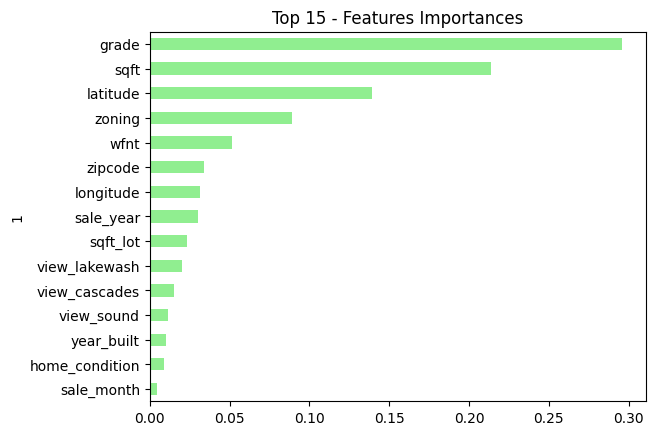

In [79]:
# Visualize the features by importance

importances_df = pd.DataFrame(sorted(zip(gb_model.feature_importances_, X.columns), reverse=True))
importances_df = importances_df.head(15)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Top 15 - Features Importances', legend=False)



In [82]:
df4 = df[['sale_price','latitude','longitude', 'sale_year', 'sale_month', 'sqft_lot', 'sqft', 'zoning','zipcode','year_built','beds','home_condition','grade','fbsmt_grade','stories','bath_full']]
# removed 'land_val', 'imp_val'

In [83]:
df4 = df4[~df4['sale_year'].isin([2018,2019])]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15726 entries, 135 to 24937
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_price      15726 non-null  int64  
 1   latitude        15726 non-null  float64
 2   longitude       15726 non-null  float64
 3   sale_year       15726 non-null  int64  
 4   sale_month      15726 non-null  int64  
 5   sqft_lot        15726 non-null  int64  
 6   sqft            15726 non-null  int64  
 7   zoning          15726 non-null  int64  
 8   zipcode         15726 non-null  int64  
 9   year_built      15726 non-null  int64  
 10  beds            15726 non-null  int64  
 11  home_condition  15726 non-null  int64  
 12  grade           15726 non-null  int64  
 13  fbsmt_grade     15726 non-null  int64  
 14  stories         15726 non-null  float64
 15  bath_full       15726 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.0 MB


In [84]:
# define y for specific price bin
# filtered_df1 =  0− 500k
y = df4['sale_price']

# establish features for specific bin
X = df4.copy()
X.drop(columns=['sale_price'], axis=1, inplace=True)
X.head()

,latitude,longitude,sale_year,sale_month,sqft_lot,sqft,zoning,zipcode,year_built,beds,home_condition,grade,fbsmt_grade,stories,bath_full
135,47.70,-122.32,2020,1,5940,740,3,98125,1949,2,4,6,0,1.00,1
136,47.71,-122.31,2020,1,8480,2570,5,98125,1947,4,4,7,0,2.00,2
137,47.67,-122.33,2020,1,6120,1200,3,98115,1901,2,3,6,0,1.00,1
138,47.57,-122.41,2020,2,7089,930,3,98116,1941,2,4,7,0,1.00,1
139,47.53,-122.32,2020,2,6000,950,3,98108,1907,3,3,6,0,1.00,1


In [86]:
# initiate scaler
scaler = StandardScaler()

#split, and fit train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit scaler
X_scaler = scaler.fit(X_train)

# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create and train a GradientBoostingRegressor
gb_model = ensemble.GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, min_samples_split = 10, min_samples_leaf = 5, random_state=42)


# Fit model with training data
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          n_estimators=200, random_state=42)

In [87]:
# predict prices
y_pred = gb_model.predict(X_test_scaled)

#format numbers with 2 decimals places
pd.options.display.float_format = '{:.2f}'.format


mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),2)
r2 = r2_score(y_test, y_pred)

absolute_diff = np.abs(y_test - y_pred)

#Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Absolute Difference': absolute_diff
})

# Print the comparison DataFrame
print(comparison_df)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

       Actual Price  Predicted Price  Absolute Difference
13329        810000        712807.88             97192.12
16534        600000        669542.17             69542.17
20185        875000        932735.63             57735.63
17441       1015000        782722.13            232277.87
223          993000       1032108.33             39108.33
...             ...              ...                  ...
10731       1015000       1087821.10             72821.10
18017       1655000       1548998.62            106001.38
24521       1550000       1267250.34            282749.66
2566         820000       1150725.67            330725.67
22767       1165000       1010254.06            154745.94

[3146 rows x 3 columns]
Root Mean Squared Error: 339281.06
R-squared: 0.7637479841468704
